https://colab.research.google.com/github/Tony607/efficientnet_keras_transfer_learning/blob/master/Keras_efficientnet_transfer_learning.ipynb#scrollTo=SmzQmZdKDfSF

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
batch_size = 32 #改

width = 448
height = 448
epochs = 20
dropout_rate = 0.2 #改
input_shape = (height, width, 3)

In [3]:
# Options: EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
# Higher the number, the more complex the model is.
from tensorflow.keras.applications import EfficientNetB0 as Net

In [4]:
# loading pretrained conv base model
conv_base = Net(weights='imagenet', include_top=False, input_shape=input_shape)

16719872/16705208 [==============================] - 0s 0us/step


In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import shutil
#os.mkdir('/content/drive/MyDrive/碩一上/作業/基於深度學習之視覺辨識/HW1/train')

class_path = '/content/drive/MyDrive/碩一上/作業/基於深度學習之視覺辨識/HW1/classes.txt'
with open(class_path) as f:
  classes = [x.strip() for x in f.readlines()]  # all the testing images

#for i in classes:
#  os.mkdir('/content/drive/MyDrive/碩一上/作業/基於深度學習之視覺辨識/HW1/train/'+i[0:3])

In [7]:
BASE_DIR = '/content/drive/MyDrive/碩一上/作業/基於深度學習之視覺辨識/HW1/new_split'
print('BASE_DIR contains ', os.listdir(BASE_DIR))
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALIDATION_DIR = os.path.join(BASE_DIR, 'val')
print(len(os.listdir(TRAIN_DIR)))
print(len(os.listdir(VALIDATION_DIR)))

BASE_DIR contains  ['train', 'val']
200
200


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        TRAIN_DIR,
        # All images will be resized to target height and width.
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2400 images belonging to 200 classes.
Found 600 images belonging to 200 classes.


In [9]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))
# model.add(layers.Flatten(name="flatten"))
if dropout_rate > 0:
    model.add(layers.Dropout(dropout_rate, name="dropout_out"))
# model.add(layers.Dense(256, activation='relu', name="fc1"))
model.add(layers.Dense(200, activation='softmax', name="fc_out"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 14, 14, 1280)      4049571   
_________________________________________________________________
gap (GlobalMaxPooling2D)     (None, 1280)              0         
_________________________________________________________________
dropout_out (Dropout)        (None, 1280)              0         
_________________________________________________________________
fc_out (Dense)               (None, 200)               256200    
Total params: 4,305,771
Trainable params: 4,263,748
Non-trainable params: 42,023
_________________________________________________________________


In [11]:
print('This is the number of trainable layers '
      'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable layers '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable layers before freezing the conv base: 213
This is the number of trainable layers after freezing the conv base: 2


In [12]:
import tensorflow as tf
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
#optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
#model.compile(loss='categorical_crossentropy',
              #optimizer=optimizer,
              #metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 14, 14, 1280)      4049571   
_________________________________________________________________
gap (GlobalMaxPooling2D)     (None, 1280)              0         
_________________________________________________________________
dropout_out (Dropout)        (None, 1280)              0         
_________________________________________________________________
fc_out (Dense)               (None, 200)               256200    
Total params: 4,305,771
Trainable params: 256,200
Non-trainable params: 4,049,571
_________________________________________________________________


In [13]:
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/30
75/75 [==============================] - 1629s 22s/step - loss: 77.6463 - acc: 0.0271 - val_loss: 96.7385 - val_acc: 0.0433
Epoch 2/30
75/75 [==============================] - 109s 1s/step - loss: 75.6539 - acc: 0.0833 - val_loss: 52.9913 - val_acc: 0.1667
Epoch 3/30
75/75 [==============================] - 108s 1s/step - loss: 40.1490 - acc: 0.1892 - val_loss: 34.0142 - val_acc: 0.1683
Epoch 4/30
75/75 [==============================] - 108s 1s/step - loss: 26.5780 - acc: 0.2883 - val_loss: 21.3111 - val_acc: 0.3317
Epoch 5/30
75/75 [==============================] - 108s 1s/step - loss: 17.8812 - acc: 0.3542 - val_loss: 17.3177 - val_acc: 0.3833
Epoch 6/30
75/75 [==============================] - 108s 1s/step - loss: 13.4517 - acc: 0.4288 - val_loss: 12.7530 - val_acc: 0.4233
Epoch 7/30
75/75 [==============================] - 107s 1s/step - loss: 10.5362 - acc: 0.4754 - val_loss: 13.6400 - val_acc: 0.4417
Epoch 8/30
75/75 [==============================] - 107s 1s/step - 

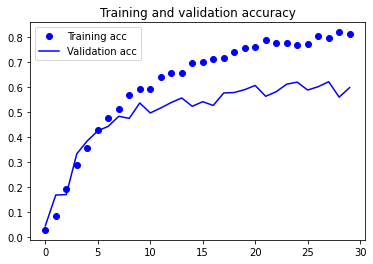

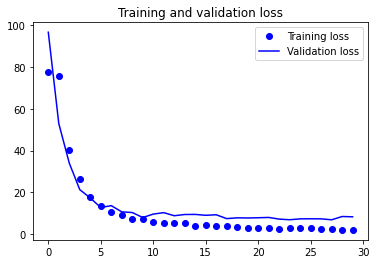

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_x = range(len(acc))

plt.plot(epochs_x, acc, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_x, loss, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 14, 14, 1280)      4049571   
_________________________________________________________________
gap (GlobalMaxPooling2D)     (None, 1280)              0         
_________________________________________________________________
dropout_out (Dropout)        (None, 1280)              0         
_________________________________________________________________
fc_out (Dense)               (None, 200)               256200    
Total params: 4,305,771
Trainable params: 256,200
Non-trainable params: 4,049,571
_________________________________________________________________


In [16]:
def unfreeze_model(model):
    for layer in model.layers: 
      layer.trainable = True
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])


unfreeze_model(model)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 14, 14, 1280)      4049571   
_________________________________________________________________
gap (GlobalMaxPooling2D)     (None, 1280)              0         
_________________________________________________________________
dropout_out (Dropout)        (None, 1280)              0         
_________________________________________________________________
fc_out (Dense)               (None, 200)               256200    
Total params: 4,305,771
Trainable params: 4,263,748
Non-trainable params: 42,023
_________________________________________________________________


改變batch size 從32到8

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        TRAIN_DIR,
        # All images will be resized to target height and width.
        target_size=(height, width),
        batch_size=8,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(height, width),
        batch_size=8,
        class_mode='categorical')

Found 2400 images belonging to 200 classes.
Found 600 images belonging to 200 classes.


In [18]:
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      verbose=1)


Epoch 1/15
300/300 [==============================] - 143s 452ms/step - loss: 6.3098 - acc: 0.2979 - val_loss: 2.8515 - val_acc: 0.5017
Epoch 2/15
300/300 [==============================] - 134s 445ms/step - loss: 1.8121 - acc: 0.5671 - val_loss: 2.3388 - val_acc: 0.5433
Epoch 3/15
300/300 [==============================] - 133s 443ms/step - loss: 1.2654 - acc: 0.6871 - val_loss: 1.9827 - val_acc: 0.5667
Epoch 4/15
300/300 [==============================] - 134s 445ms/step - loss: 0.8748 - acc: 0.7600 - val_loss: 2.0276 - val_acc: 0.5933
Epoch 5/15
300/300 [==============================] - 133s 444ms/step - loss: 0.6750 - acc: 0.8142 - val_loss: 1.9081 - val_acc: 0.6333
Epoch 6/15
300/300 [==============================] - 134s 446ms/step - loss: 0.6122 - acc: 0.8313 - val_loss: 1.7950 - val_acc: 0.6333
Epoch 7/15
300/300 [==============================] - 134s 447ms/step - loss: 0.5807 - acc: 0.8300 - val_loss: 1.8546 - val_acc: 0.6633
Epoch 8/15
300/300 [============================

In [19]:
from google.colab import files
model.save('my_model') 
files.download('my_model')

INFO:tensorflow:Assets written to: my_model/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:

model.save('model_v11_SGD.h5') 
files.download('model_v11_SGD.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import os
import numpy as np
import numpy as np
from keras.preprocessing.image import img_to_array, load_img


with open('/content/drive/MyDrive/碩一上/作業/基於深度學習之視覺辨識/HW1/testing_img_order.txt') as f:
     test_images = [x.strip() for x in f.readlines()]  # all the testing images

submission = []
i=0
for img_name in test_images:  # image order is important to your result
  img_path = '/content/drive/MyDrive/碩一上/作業/基於深度學習之視覺辨識/HW1/testing_images/'+img_name
  img = load_img(img_path, target_size=(448, 448))  # this is a PIL image
  x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
  x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

  result = model.predict(x)
  cn = np.argmax(result,axis=1)
  submission.append([img_name, classes[cn[0]]])
  i +=1
  print(i)
  print([img_name, classes[cn[0]]])

np.savetxt('answer_v13_0.txt', submission, fmt='%s')
files.download('answer_v13_0.txt')

串流輸出內容已截斷至最後 5000 行。
534
['1953.jpg', '179.Tennessee_Warbler']
535
['1358.jpg', '066.Western_Gull']
536
['4924.jpg', '005.Crested_Auklet']
537
['5942.jpg', '170.Mourning_Warbler']
538
['2042.jpg', '004.Groove_billed_Ani']
539
['3852.jpg', '060.Glaucous_winged_Gull']
540
['4457.jpg', '054.Blue_Grosbeak']
541
['0234.jpg', '132.White_crowned_Sparrow']
542
['3916.jpg', '139.Scarlet_Tanager']
543
['3026.jpg', '141.Artic_Tern']
544
['3027.jpg', '020.Yellow_breasted_Chat']
545
['3365.jpg', '002.Laysan_Albatross']
546
['4094.jpg', '119.Field_Sparrow']
547
['1340.jpg', '070.Green_Violetear']
548
['4638.jpg', '062.Herring_Gull']
549
['5088.jpg', '061.Heermann_Gull']
550
['2146.jpg', '001.Black_footed_Albatross']
551
['0421.jpg', '145.Elegant_Tern']
552
['2241.jpg', '005.Crested_Auklet']
553
['3190.jpg', '107.Common_Raven']
554
['5553.jpg', '002.Laysan_Albatross']
555
['0827.jpg', '121.Grasshopper_Sparrow']
556
['1462.jpg', '088.Western_Meadowlark']
557
['3950.jpg', '106.Horned_Puffin']
558
['579

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>